In [12]:
import random 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv


In [32]:
def sigmoid(x):
    return 1.0/ (1.0 + np.exp(-x)) 
def dsigmoid(x):
    return np.exp(x)/ (1.0 + np.exp(x))**2


class MLP:
    def __init__(self):
            self.layers=4 #1st is the input layer
            self.d=[1,2,3,1] #d is the list of no. of nodes in each layer 
            self.b = [None]
            self.w = [None]
            self.a = [None]
            self.z = [None]

            
    def initialise(self):
        for idx in range(self.layers-1):
            self.w.append(np.array([[ random.random()   for i in range(self.d[idx])] for j in range(self.d[idx+1])]))
           # bias=random.random() 
            self.b.append(np.array([1 for j in range(self.d[idx+1])]))
        #print(self.w[1].shape)
                                   
    def forward_prop(self,X):
        self.a = [None]
        self.z = [None]
      
        self.a[0]=X
        #print(self.a[0].shape)
        for layer in range(1,self.layers):
            self.z.append(np.dot(self.w[layer],self.a[layer-1]) + self.b[layer])
            self.a.append(sigmoid(self.z[layer]))
            

        
    def back_prop(self,X,Y):
        last_l = self.layers-1 #index of last layer 
        self.dw = [None for _ in range(last_l+1)]
        self.delta = [None for _ in range(last_l+1)]
        self.delta[last_l] = np.multiply((self.a[last_l]-Y),dsigmoid(self.z[last_l])) 
       
        #Reshaping the 1-D arrays. Numpy does not let us find the tranpose of 1D array

        del_2D = self.delta[last_l].reshape(len(self.delta[last_l]),1)
        a_2D = self.a[last_l-1].reshape(len(self.a[last_l-1]),1)
        self.dw[last_l]=np.dot(del_2D,a_2D.T)
        for l in range(last_l-1,0,-1):
            self.delta[l] = np.multiply((np.dot(self.w[l+1].T,self.delta[l+1])),dsigmoid(self.z[l]))
            del_2D = self.delta[l].reshape(len(self.delta[l]),1)
            a_2D = self.a[l-1].reshape(len(self.a[l-1]),1)
            self.dw[l]=np.dot(del_2D,a_2D.T)
            
    def update_weights(self,rate):      
        for l in range(1,self.layers):
            self.w[l]=np.subtract(self.w[l],rate*self.dw[l])
            self.b[l]=np.subtract(self.b[l],rate*self.delta[l])
            
    def fit(self,X_train,y_train):
        count = 1
        epochs = 1000
        total_err = 100
        errors=[]
        epoch_n=[]
        for _ in range(epochs):
        #while total_err>0.005:
            total_err = 0
            for idx,x in enumerate(X_train):
                self.forward_prop(x)    
                err= (y_train[idx][0]-self.a[nn.layers-1][0])**2
                total_err = total_err + (0.5*err)
                nn.back_prop(x,y_train[idx])
                self.update_weights(1.5)
            total_err=total_err/len(X_train)
            if(count%10 == 1):
                print("epoch = ",count," Error = ",total_err)
                errors.append(total_err)
                epoch_n.append(count)
            count=count+1
            
        nn.show_err(errors,epoch_n)
        return errors
    
    def show_err(self,v_erro,v_epoca):
        plt.figure(figsize=(9,4))
        plt.plot(v_epoca, v_erro,color="b", marker=8)
        plt.xlabel("Number of Epochs")
        plt.ylabel("Squared error (MSE) ");
        plt.title("Error Minimisation")
        plt.show()

In [9]:
def gen_data(no_of_datapoints,filename):
    N=no_of_datapoints
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["x1","y1"])
        i = 0
        slope = np.random.uniform(-1,1)
        while(i<N):
            x = np.random.uniform(-100,100)
            y = slope*x+ np.random.uniform(-30*np.random.uniform(0,1),30*np.random.uniform(0,1)) #adding noise
            writer.writerow([x,y]) 
            i+=1

In [17]:
def plot(X,Y):
    plt.figure(figsize=(12,12))
    plt.scatter(X,Y)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()



In [4]:

def separate(X,Y):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2,shuffle=True,random_state=4)
    if X.ndim == 1:
        X_train=X_train.reshape(-1,1) #convert to 2D 
        X_test=X_test.reshape(-1,1)
    if Y.ndim == 1: #convert to 2D
        y_train=y_train.reshape(-1,1)
        y_test = y_test.reshape(-1,1)
    return X_train, X_test, y_train, y_test

In [11]:
filename = 'reg3.csv'
gen_data(500,filename)


In [13]:
df=pd.read_csv(filename)
df.head()

,x1,y1
0,-21.284491,-26.308421
1,68.641537,65.320939
2,41.486330,59.181815
3,45.372465,36.513105
4,85.771972,70.313309


In [14]:

xmin = min(df['x1']) ; xmax = max(df['x1'])
ymin = min(df['y1']) ; ymax = max(df['y1'])
df['x1'] = (df['x1'] - xmin)/(xmax - xmin) 

df['y1'] = (df['y1'] - ymin)/(ymax - ymin) 
X = df['x1'].values
Y = df['y1'].values
df.head()


,x1,y1
0,0.393885,0.395503
1,0.844720,0.865851
2,0.708580,0.834338
3,0.728063,0.717976
4,0.930602,0.891478


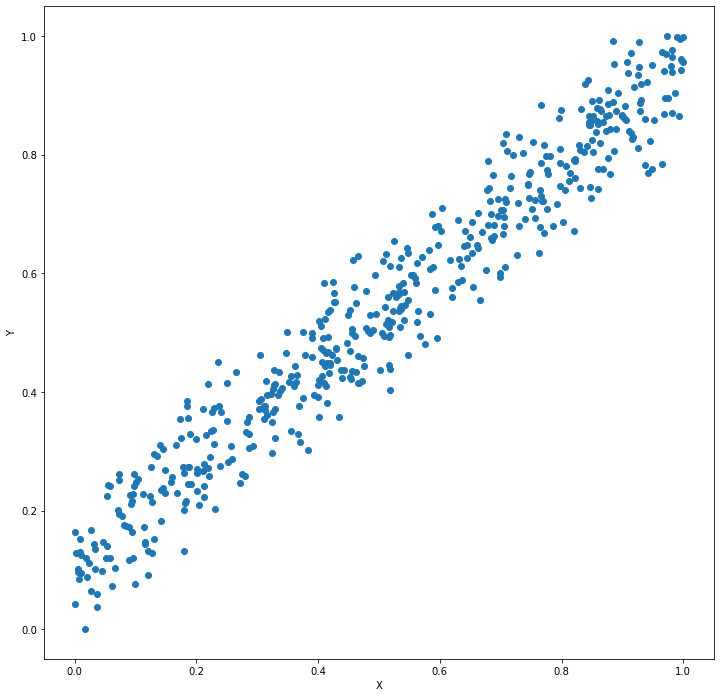

In [18]:
plot(X,Y)
X_train, X_test, y_train, y_test=separate(X,Y)

epoch =  1  Error =  0.03628418969450629
epoch =  11  Error =  0.002540677633502153
epoch =  21  Error =  0.0024694552567394983
epoch =  31  Error =  0.0024258831016567214
epoch =  41  Error =  0.0023882504852291908
epoch =  51  Error =  0.0023504110984153923
epoch =  61  Error =  0.0023072571634449156
epoch =  71  Error =  0.002256841661354445
epoch =  81  Error =  0.002201500910641789
epoch =  91  Error =  0.002145734754325842
epoch =  101  Error =  0.0020932169062039072
epoch =  111  Error =  0.0020459126938750204
epoch =  121  Error =  0.002004319635715595
epoch =  131  Error =  0.0019679586997239534
epoch =  141  Error =  0.0019359707219648128
epoch =  151  Error =  0.0019077012138428984
epoch =  161  Error =  0.0018831400580700498
epoch =  171  Error =  0.0018629190463825204
epoch =  181  Error =  0.001847609852785363
epoch =  191  Error =  0.001836917351697512
epoch =  201  Error =  0.0018297538589551806
epoch =  211  Error =  0.001824923226924544
epoch =  221  Error =  0.001821

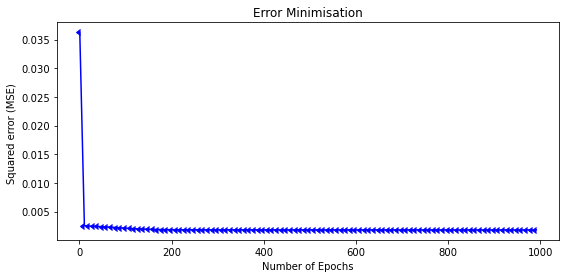

In [33]:
nn=MLP()
nn.initialise()
errors0=nn.fit(X_train,y_train)

In [34]:
def predict(nn,X,Y):
    total_err=0
    y_pred = []
    for idx,x in enumerate(X):
        nn.forward_prop(x)
        err= (Y[idx][0]-nn.a[nn.layers-1][0])**2
        y_pred.append(nn.a[nn.layers-1])
        total_err = total_err + (0.5*err)

    total_err=total_err/len(X)
    print("Out of sample error_MLP",total_err)
    return y_pred,total_err





Out of sample error_MLP 0.00219160307265155


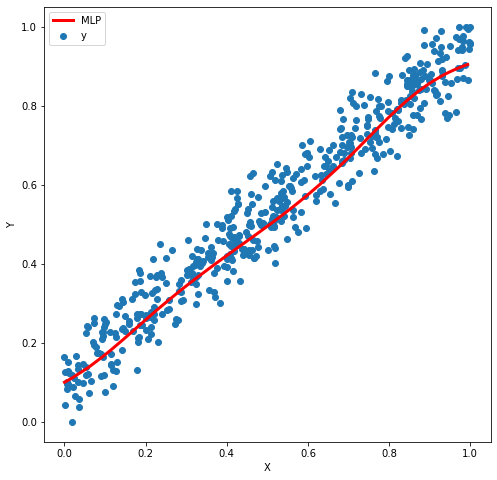

In [35]:
#Figure showing how the line fits the data
y_pred,total_err=predict(nn,X_test,y_test)
y_pred=np.array(y_pred)
#y_pred =np.array(predict(nn,X_test,y_test))
plt.figure(figsize=(8,8))


#df = df.sort_values('x1')
#y_pred=np.array(predict(nn,df['x1'].values.reshape(-1,1),df['y1'].values.reshape(-1,1)))

plt.scatter(df['x1'],df['y1'],label='y')
plt.xlabel("X")
plt.ylabel("Y")

plt.plot(np.unique(X_test[:,0]),np.unique(y_pred[:,0]),linewidth=3,c='r',label='MLP')

plt.legend()

plt.show()


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

model = LinearRegression()

model.fit(X_train,y_train)
y_pred1=model.predict(X_test)
t_err =0
for y1,y2 in zip(y_test,y_pred1):
    err=(y1[0]-y2[0])**2
    t_err+=err*0.5
t_err=t_err/len(y_test)
print("Linear regression : out of sample error ",t_err)

Linear regression : out of sample error  0.001796011493165672


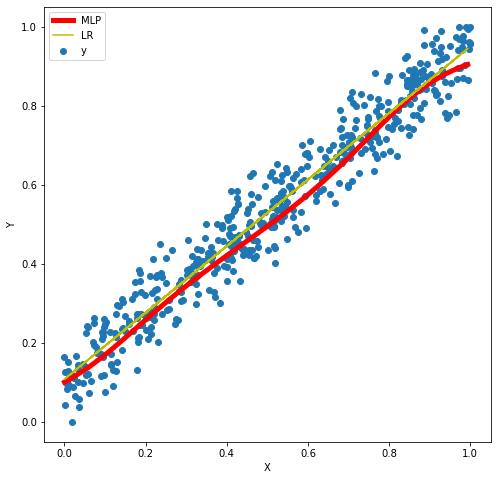

Linear regression : out of sample error  0.001796011493165672
MLP : out of sample error  0.00219160307265155


In [37]:
y_pred=np.array(y_pred)
y_pred1=np.array(y_pred1)

plt.figure(figsize=(8,8))
plt.scatter(X,Y,label='y')
plt.plot(np.unique(X_test[:,0]),np.unique(y_pred[:,0]),linewidth='5',c='r',label='MLP')
plt.plot(X_test[:,0],y_pred1[:,0],c='y',label='LR')
plt.xlabel("X")
plt.ylabel("Y")

plt.legend()


plt.show()

print("Linear regression : out of sample error ",t_err)
print("MLP : out of sample error ",total_err)
